<h1 style="text-align: center;">[Daegu Apartement Predict Price]</h1>
<h3 style="text-align: center;">[Rachmawati Hapsari Putri]</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**<br>

Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors. 

Individuals or companies usually make apartment (unit) offers. Bidders can sell units on a platform by determining their apartments’ prices. That way is quite difficult for apartment owners to adjust to market prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.

**1.2 Problem Statements**

**How to predict apartment sale prices to guide property investments and optimize real estate development strategies?**  


**1.3 Goals**

To develop a model that predicts apartment sale prices by analyzing key factors such as size, year built, number of facilities, and nearby amenities. These predictions will help sellers set competitive and accurate prices, highlight valuable property features to attract buyers, and reduce the time properties stay on the market, ensuring maximum profit through informed, data-driven decisions.

**1.4 Analytical Approach**

To address the problem, we will analyze the data to uncover patterns in the features that distinguish one apartment from another. By identifying the relationships between these features and the apartment prices, we aim to gain valuable insights into the key drivers of pricing.

Next, we will build a regression model to predict apartment prices. This predictive tool will assist sellers in setting competitive and market-aligned prices for their properties. It will also enable better decision-making by providing a clear understanding of the factors influencing apartment prices, ensuring sellers maximize revenue while attracting buyers.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

**Business Metric**

- **Property Sale Revenue**:<br>
    Measures the total revenue generated from the sale of properties, which is the primary goal of the model. Accurate predictions of property prices directly contribute to maximizing revenue for sellers.


**Machine Learning Evaluation Metrics**

- **Mean Absolute Error (MAE)**:  
  MAE calculates the average of the absolute differences between the predicted and actual prices. It helps to understand the typical error size in predicting property prices. A lower MAE means the model's predictions are closer to the actual prices.

- **Root Mean Squared Error (RMSE)**:  
  RMSE gives more weight to larger errors than MAE, making it useful for identifying cases where the model's predictions are far off. It provides an overall measure of how spread out or varied the errors are. A smaller RMSE suggests more accurate predictions.

- **Mean Absolute Percentage Error (MAPE)**:  
  MAPE measures the average percentage difference between the predicted and actual prices. This is helpful for understanding the error relative to the actual price, and it makes it easier to compare accuracy across different price ranges. A lower MAPE indicates better prediction accuracy, especially for relative price accuracy.

- **R² (R-squared, Coefficient of Determination)**:  
  R² shows how well the model’s features (such as apartment size, location, and amenities) explain the variation in the target variable (property sale price). A higher R² means the model does a good job of capturing the factors that affect the sale price, making its predictions more reliable.

**1.6 Success Criteria**

- Achieve MAE and RMSE values that are sufficiently low compared to the average apartment price range.
- Obtain a MAPE of less than 5-10% to ensure consistent relative accuracy across varying price levels.
- Obtain an R² value of at least 0.8, meaning the model explains 80% or more of the variance in apartment prices.

## **Section 2. Data Understanding**

**2.1 General Information**

| Name | Description |
| ------------------ |------------------- |
Hallway Type| Apartment type
TimeToSubway| Time needed to the nearest subway station
SubwayStation| The name of the nearest subway station
N_FacilitiesNearBy(ETC)| The number of facilities nearby
N_FacilitiesNearBy(PublicOffice)| The number of public office facilities nearby
N_SchoolNearBy(University)| The number of universities nearby
N_Parkinglot(Basement)| The number of the parking lot
YearBuilt| The year the apartment was built
N_FacilitiesInApt| Number of facilities in the apartment
Size(sqft)| The apartment size (in square feet)
SalePrice| The apartment price (Won)

**2.2 Feature Information**

| Feature | Impact to Business |
|---------| ------------------ |
Hallway Type| Different apartment types often appeal to different buyers based on lifestyle, family size, or cultural preferences
TimeToSubway| Proximity to public transportation is a critical factor influencing convenience, demand, and value.
SubwayStation| The reputation and connectivity of a subway station (e.g., central, busy, or well-connected stations) can affect apartment desirability.
N_FacilitiesNearBy(ETC)| The availability of general facilities such as shops, restaurants, or parks enhances livability and demand.
N_FacilitiesNearBy(PublicOffice)| Proximity to government or administrative facilities improves convenience for residents who frequently access these services.
N_SchoolNearBy(University)| Proximity to universities increases demand from students, faculty, and investors looking for rental income
N_Parkinglot(Basement)| Adequate parking facilities significantly impact the convenience for car owners, particularly in urban areas where parking is limited.
YearBuilt| Newer apartments often have modern features and infrastructure, while older ones may need renovations, impacting desirability and pricing.
N_FacilitiesInApt| Facilities within the apartment complex (e.g., gyms, pools, security) increase convenience, lifestyle value, and overall attractiveness.
Size(sqft)| Apartment size is a fundamental factor influencing price. Larger apartments typically command higher values.

### Importing libraries & packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from category_encoders import BinaryEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBRegressor
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

**Import Dataset**

In [2]:
df = pd.read_csv('data_daegu_apartment.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


**2.3 Statistics Summary**

In [4]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [5]:
df.describe(include=object)

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


In [6]:
pd.set_option('display.max_colwidth', None)
data = []
for col in df.columns:
    data.append([col, df[col].nunique(), df[col].unique()])

dgu = pd.DataFrame(data, columns=['Column Name', 'Number of Unique', 'Unique Sample'])
dgu

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [7]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

<Axes: >

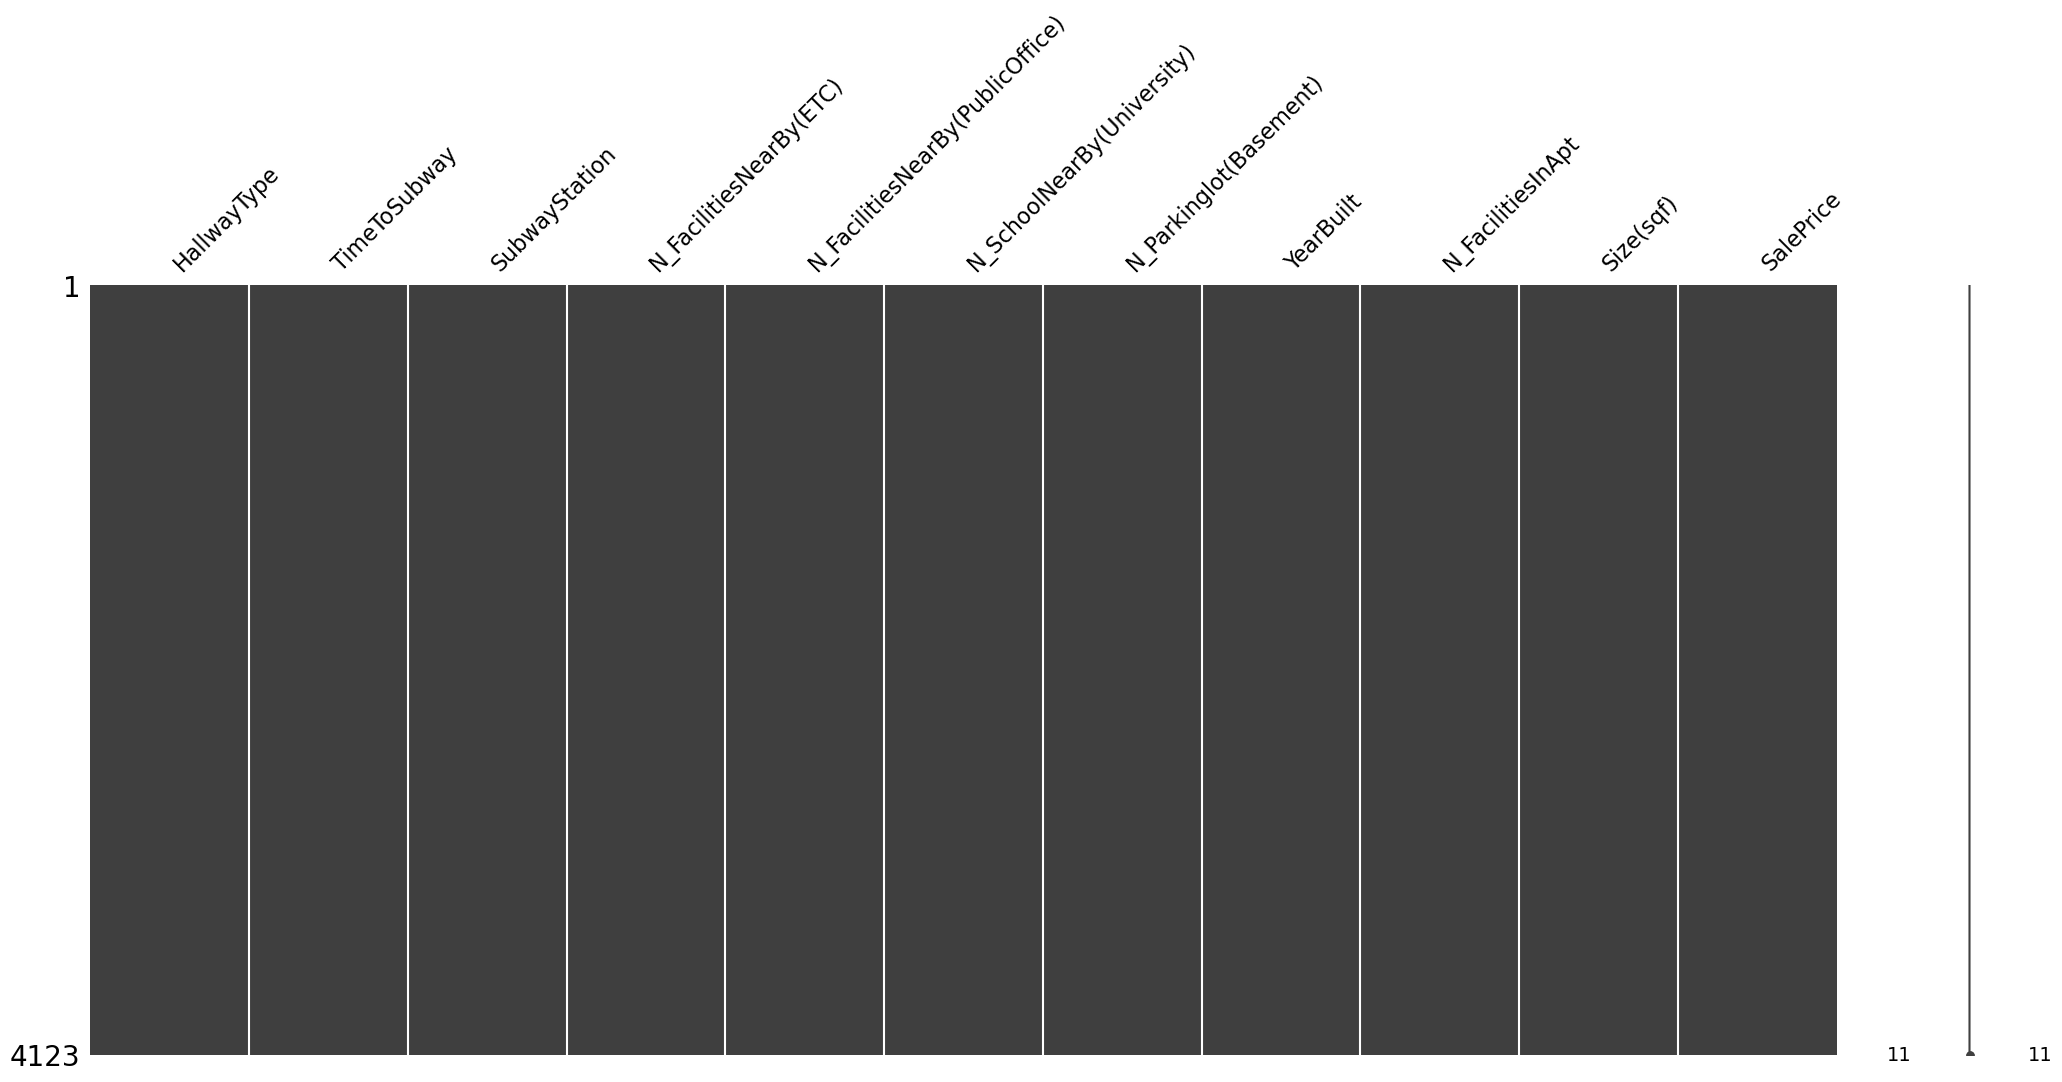

In [8]:
import missingno
missingno.matrix(df)

In [9]:
print(f'{(df.isnull().sum() / len(df)) * 100}')

HallwayType                         0.0
TimeToSubway                        0.0
SubwayStation                       0.0
N_FacilitiesNearBy(ETC)             0.0
N_FacilitiesNearBy(PublicOffice)    0.0
N_SchoolNearBy(University)          0.0
N_Parkinglot(Basement)              0.0
YearBuilt                           0.0
N_FacilitiesInApt                   0.0
Size(sqf)                           0.0
SalePrice                           0.0
dtype: float64


There is no Missing Values in this dataset

**3.2 Duplicated Values**

In [10]:
df[df.duplicated()]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


Unexpectedly, there is 1422 row of data duplicate in this dataset

In [11]:
df[(df['Size(sqf)'] == 910) & (df['SalePrice'] == 263345)]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
18,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
790,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
1396,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
1970,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
2286,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345


To make sure the data duplicate, i try to see the size and price of one data, and turns out there is 6 duplicate of this data, so we need to remove it because the machine learning model is senistive with duplicate data. 

In [12]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
df.shape

(2701, 11)

In [14]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
2696,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
2697,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
2698,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
2699,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


**3.3 Identify Spelling Errors**

In [15]:
categoric_features = df.select_dtypes('object')

for col in categoric_features.columns:
    print(f"Total Category on '{col}': {df[col].nunique()}")

Total Category on 'HallwayType': 3
Total Category on 'TimeToSubway': 5
Total Category on 'SubwayStation': 8


In [16]:
for column in categoric_features.columns:
    print(f"Unique values in {column}:")
    print(categoric_features[column].unique())
    print("-" * 50)


Unique values in HallwayType:
['terraced' 'mixed' 'corridor']
--------------------------------------------------
Unique values in TimeToSubway:
['0-5min' '10min~15min' '15min~20min' '5min~10min' 'no_bus_stop_nearby']
--------------------------------------------------
Unique values in SubwayStation:
['Kyungbuk_uni_hospital' 'Chil-sung-market' 'Bangoge' 'Sin-nam'
 'Banwoldang' 'no_subway_nearby' 'Myung-duk' 'Daegu']
--------------------------------------------------


No Spelling error in this dataset

**3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)
- Check Cardinality (Categorical Variable)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
numeric_features = df.select_dtypes(include='number')

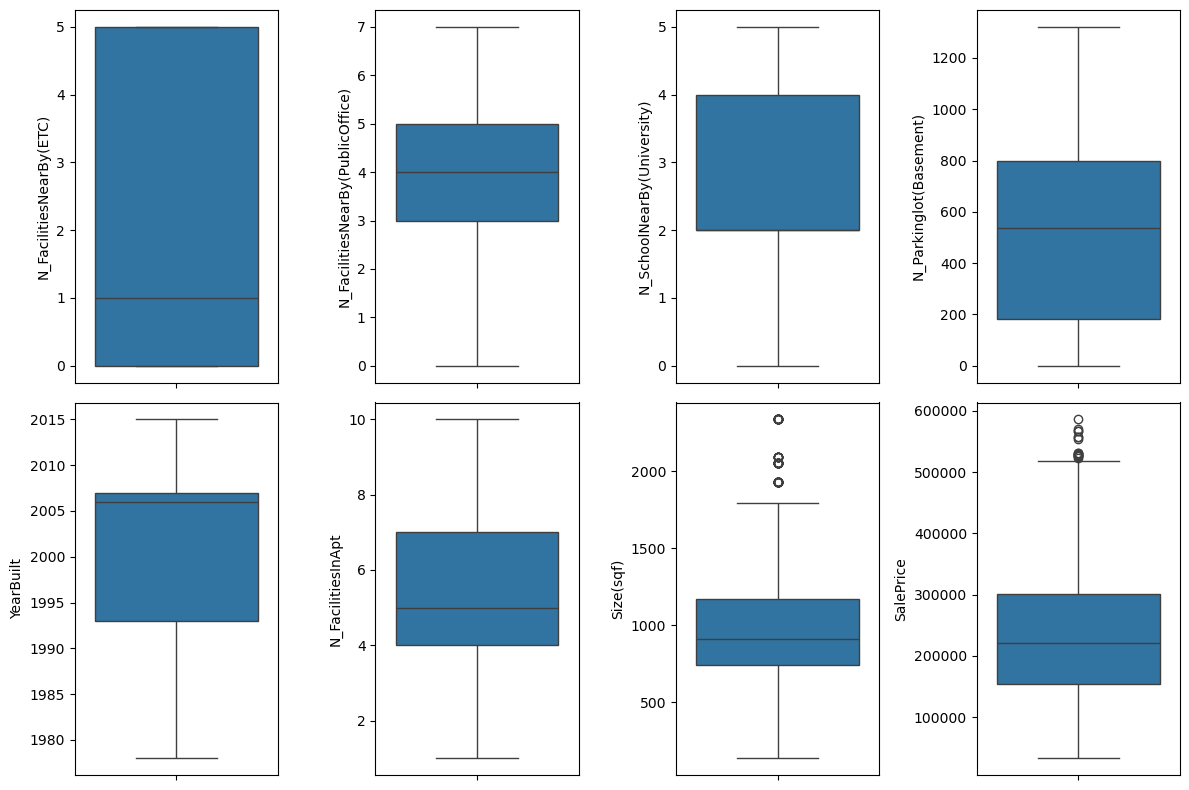

In [19]:
plt.figure(figsize=(12,8))
for idx,col in enumerate(numeric_features.columns, start=1):
    sns.boxplot(df[col], ax=plt.subplot(2, 4,idx))
plt.tight_layout()
plt.show()

There is no anomaly in the categoric feature, but there is outlier in Size and Price Column

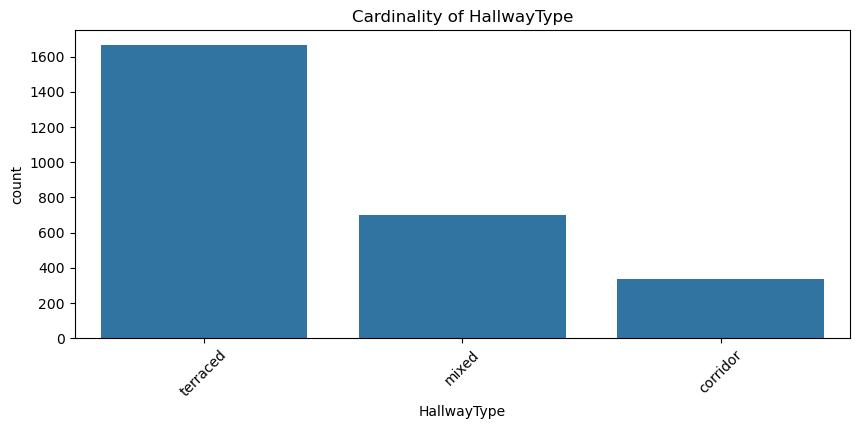

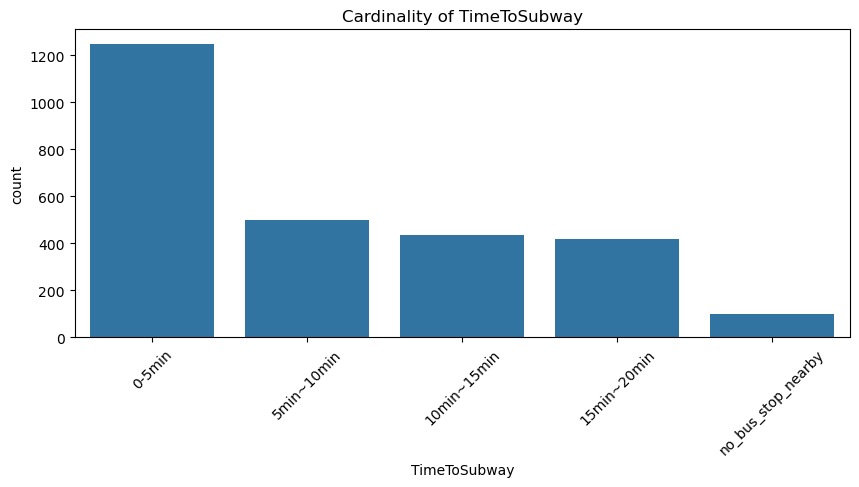

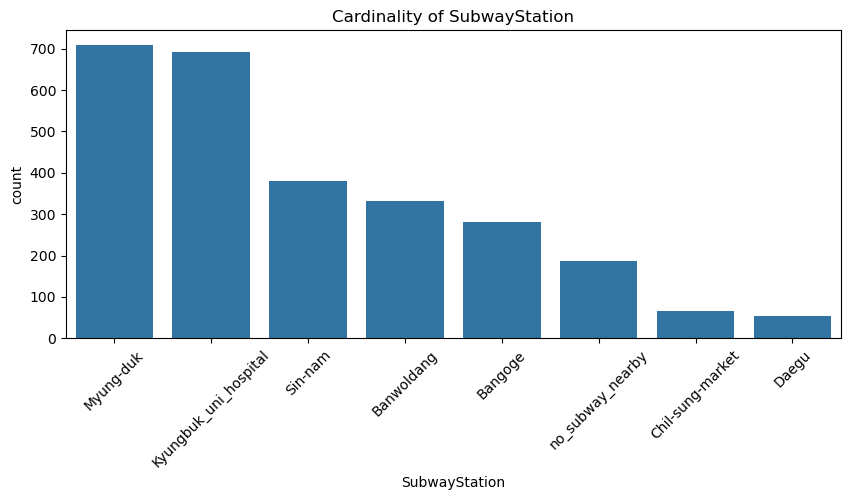

In [20]:
for col in categoric_features.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Cardinality of {col}")
    plt.xticks(rotation=45)
    plt.show()

For categoric features, there is no anomaly data.

**3.5 Identify Outlier Values**

In [21]:
def find_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_limit = q1 - limit
    upper_limit = q3 + limit
    print(f'lower: {lower_limit}')
    print(f'upper: {upper_limit}') 
    
    outliers = data[(data < lower_limit) | (data > upper_limit)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(data)) * 100

    print(f'Number of outliers: {num_outliers}')
    print(f'Percentage of outliers: {percentage_outliers:.2f}%')

In [22]:
find_outlier(df['SalePrice'])

IQR: 147345.0
lower: -67478.5
upper: 521901.5
Number of outliers: 17
Percentage of outliers: 0.63%


In [23]:
find_outlier(df['Size(sqf)'])

IQR: 424.0
lower: 107.0
upper: 1803.0
Number of outliers: 84
Percentage of outliers: 3.11%


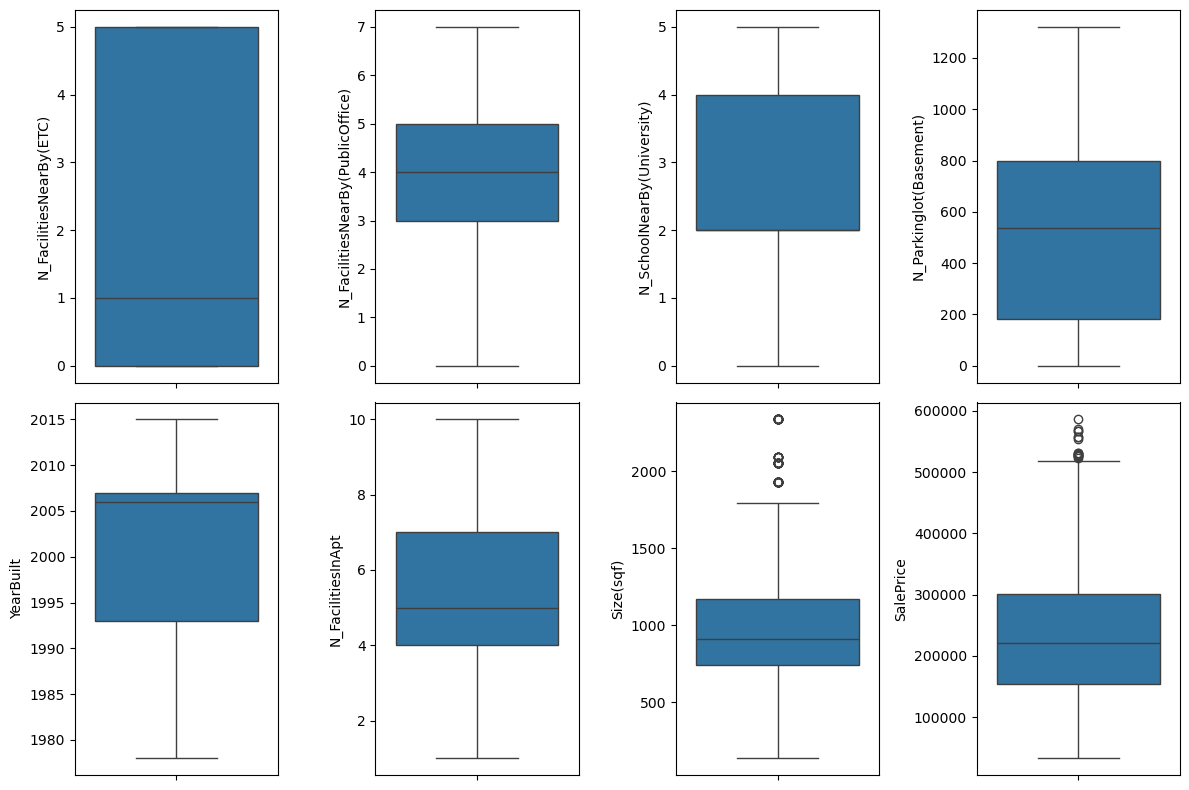

In [24]:
plt.figure(figsize=(12,8))
for idx,col in enumerate(numeric_features.columns, start=1):
    sns.boxplot(df[col], ax=plt.subplot(2, 4,idx))
plt.tight_layout()
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):
  vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return pd.DataFrame(dict(feature=X.columns, VIF=vif_values))

In [26]:
vif_result = vif(numeric_features.drop('SalePrice', axis=1))
vif_result

,feature,VIF
0,N_FacilitiesNearBy(ETC),5.975305
1,N_FacilitiesNearBy(PublicOffice),13.896514
2,N_SchoolNearBy(University),16.257819
3,N_Parkinglot(Basement),11.266549
4,YearBuilt,30.259604
5,N_FacilitiesInApt,26.112948
6,Size(sqf),8.666827


In [27]:
n_mul = vif_result[vif_result['VIF'] > 10]
print(f"There are {len(n_mul)} of {len(vif_result)} features identified as having multicollinearity problems")

There are 5 of 7 features identified as having multicollinearity problems


In this analysis, multicollinearity is present among variables such as YearBuilt, N_FacilitiesInApt, and others, as indicated by their high VIF values. While multicollinearity can complicate the interpretation of coefficients in linear models, it does not inherently affect the predictive power of advanced machine learning models, such as Random Forest, XGBoost, and AdaBoost. These models are designed to handle correlated features effectively without requiring their removal. 

Additionally, each variable provides valuable information about apartment characteristics, such as size, amenities, and age, which are all crucial factors in determining selling prices in the real estate market of Daegu. Removing these variables could result in a loss of critical insights that align with the business context. 

Therefore, considering the objective of this analysis is predictive modeling rather than strict interpretability, and the robustness of the chosen machine learning models against multicollinearity, I have chosen to retain all variables. This approach ensures the model captures the full range of influential factors affecting apartment prices while leveraging the strengths of models like XGBoost to handle multicollinearity effectively.

## **Section 4. Data Generation**

**4.1 Constructing `Seen` and `Unseen` Data**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
df_seen, df_unseen= train_test_split(df, test_size=0.2, random_state=42)

**4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

In [30]:
train, test = train_test_split(df_seen, test_size=0.2, random_state=42)

## **Section 5. Exploratory Data Analysis (EDA)**

**5.1 Check Distribution**

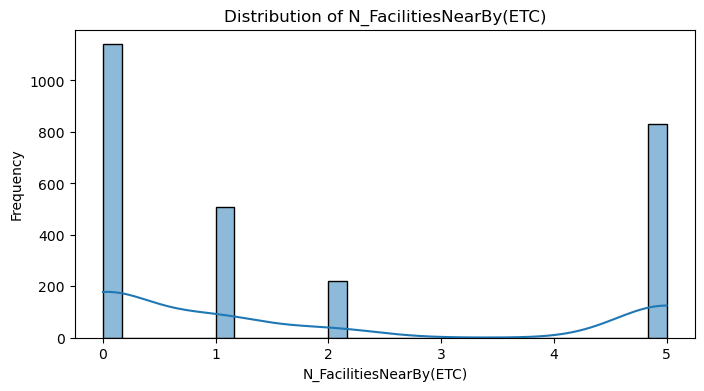

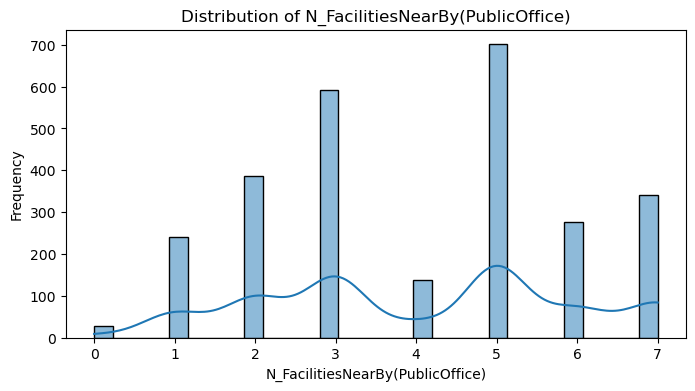

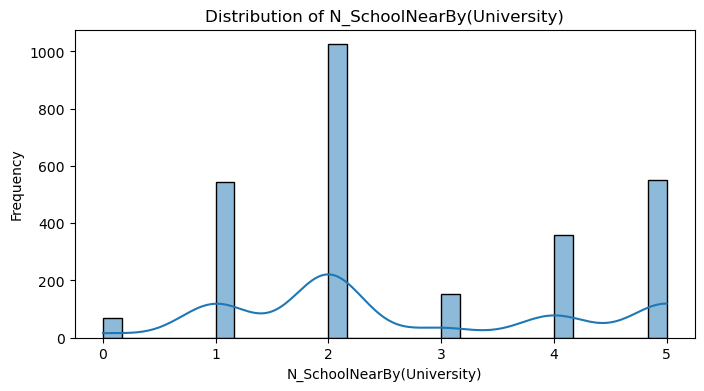

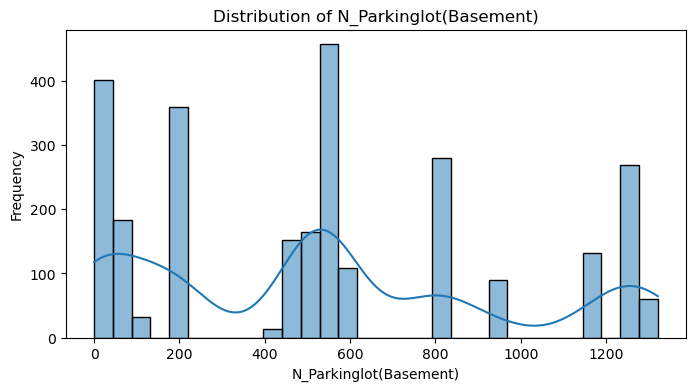

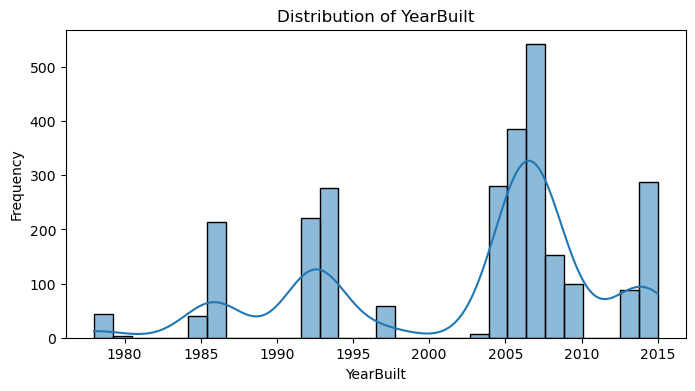

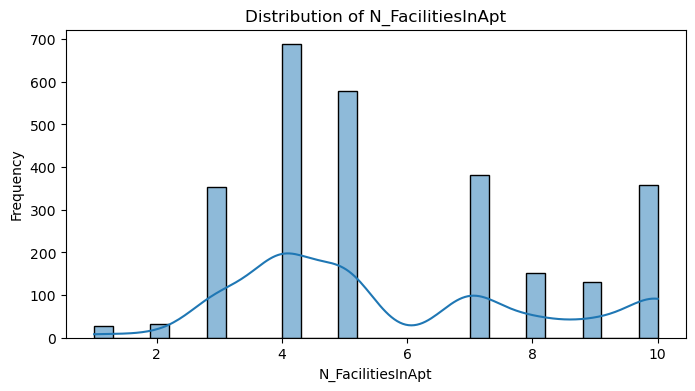

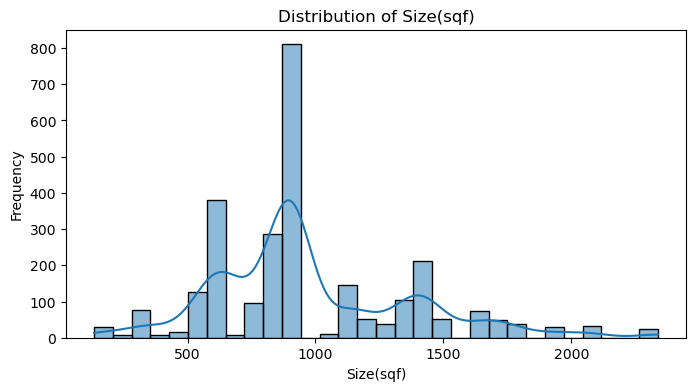

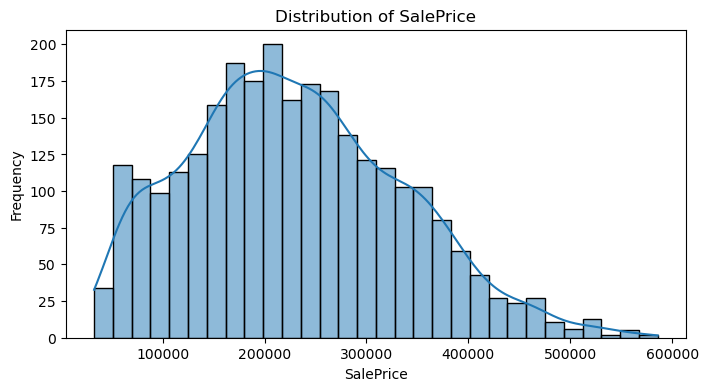

In [31]:
for column in numeric_features.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_features[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [32]:
print(f"Total Apartement in Nearest Subway Station:\n{df['SubwayStation'].value_counts()}")
print(f"\nType of Hallway Apartment:\n{df['HallwayType'].value_counts()}")

Total Apartement in Nearest Subway Station:
SubwayStation
Myung-duk                709
Kyungbuk_uni_hospital    692
Sin-nam                  380
Banwoldang               333
Bangoge                  280
no_subway_nearby         188
Chil-sung-market          65
Daegu                     54
Name: count, dtype: int64

Type of Hallway Apartment:
HallwayType
terraced    1667
mixed        698
corridor     336
Name: count, dtype: int64


In [33]:
subway_type = (df.groupby(['SubwayStation', 'HallwayType'])['HallwayType']
    .count()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)
subway_time = (
    df.groupby(['SubwayStation', 'TimeToSubway'])['TimeToSubway']
    .count()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

In [34]:
subway_time

,SubwayStation,TimeToSubway,Count
5,Kyungbuk_uni_hospital,0-5min,402
9,Myung-duk,15min~20min,353
10,Sin-nam,0-5min,333
1,Banwoldang,0-5min,301
6,Kyungbuk_uni_hospital,10min~15min,290
0,Bangoge,5min~10min,280
7,Myung-duk,0-5min,212
8,Myung-duk,10min~15min,144
13,no_subway_nearby,no_bus_stop_nearby,100
12,no_subway_nearby,5min~10min,88


In [35]:
subway_type

,SubwayStation,HallwayType,Count
7,Kyungbuk_uni_hospital,terraced,648
9,Myung-duk,mixed,353
12,Sin-nam,terraced,333
2,Banwoldang,terraced,301
0,Bangoge,mixed,280
10,Myung-duk,terraced,212
14,no_subway_nearby,terraced,160
8,Myung-duk,corridor,144
3,Chil-sung-market,mixed,65
11,Sin-nam,corridor,47


In [36]:
df_median_price = df.groupby(by=['SubwayStation']).agg({'SalePrice':'median'}).reset_index()
df_median_price = df_median_price.set_index('SubwayStation')
df_median_price = df_median_price.sort_values('SalePrice', ascending =False)
df_median_price.head()

,SalePrice
SubwayStation,
Banwoldang,295575.0
Sin-nam,251327.0
Kyungbuk_uni_hospital,250884.5
no_subway_nearby,236725.5
Bangoge,179867.0


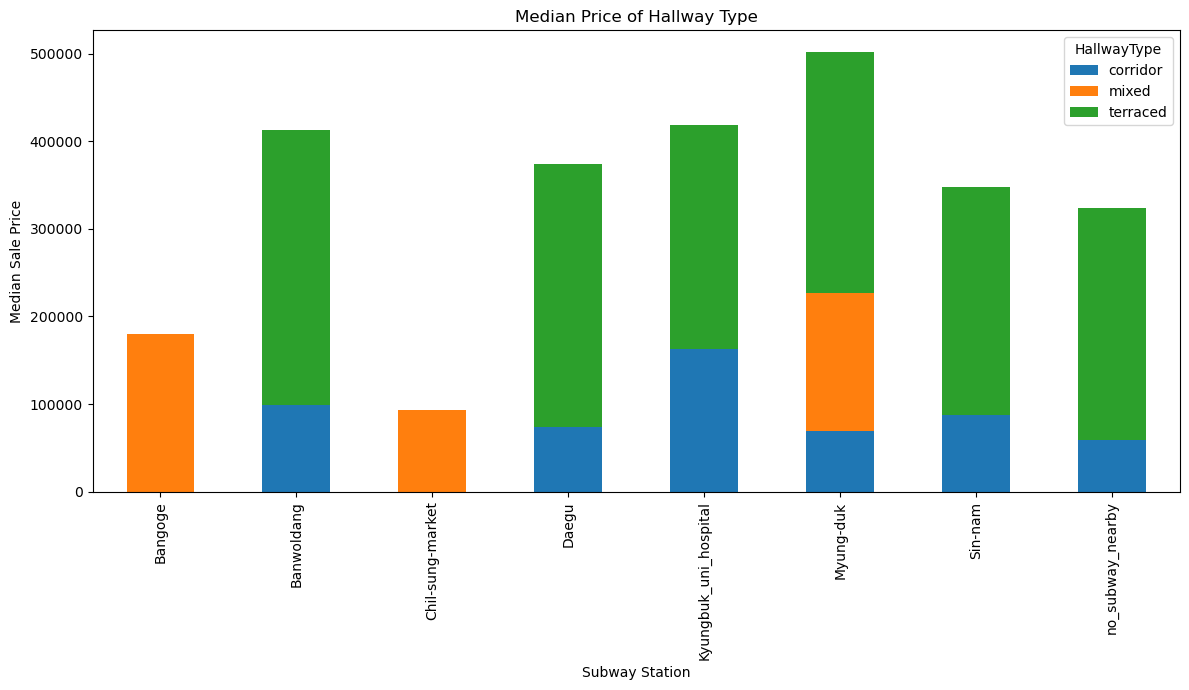

In [37]:
import matplotlib.pyplot as plt

# Create a pivot table
subway_pivot = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')

# Plot the pivot table as a stacked bar chart
pivot_plot = subway_pivot.plot.bar(stacked=True, figsize=(12, 7))

# Customize the plot
pivot_plot.set_xlabel('Subway Station')
pivot_plot.set_ylabel('Median Sale Price')
pivot_plot.set_title('Median Price of Hallway Type')

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

Text(0.5, 1.0, 'Hallway Type per Nearest Subway Station')

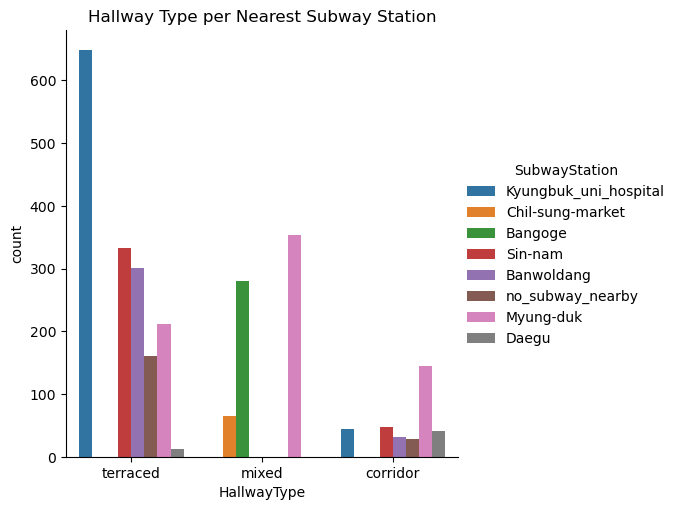

In [38]:
sns.catplot(x='HallwayType', kind='count', hue='SubwayStation', data=df) 
plt.title('Hallway Type per Nearest Subway Station')

**5.2 Correlation Analysis**

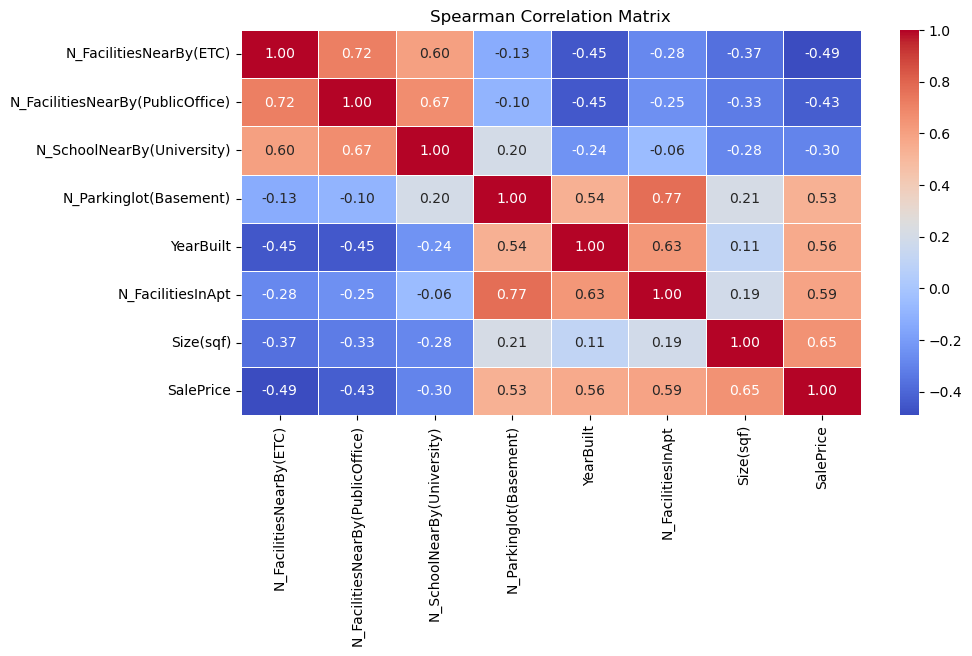

In [39]:
correlation_matrix = numeric_features.corr(method='spearman')
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

- Strong Positive Correlations:<br>
    SalePrice shows a strong positive correlation with:<br>
    - Size(sqf) (0.65): Larger apartments are associated with higher sale prices.
    - N_FacilitiesInApt (0.59): More facilities in an apartment complex increase its value.
    - YearBuilt (0.56): Newer buildings tend to have higher sale prices.
    - N_Parkinglot(Basement) and N_FacilitiesInApt (0.77): Apartments with basement parking lots tend to have more facilities.

- Negative Correlations:<br>
    SalePrice negatively correlates with:
    - N_FacilitiesNearBy(ETC) (-0.49): Apartments with many nearby facilities of type "ETC" tend to have lower sale prices.
    - N_FacilitiesNearBy(PublicOffice) (-0.43): The proximity to public offices seems to negatively influence prices.
    - YearBuilt and N_FacilitiesNearBy(ETC) (-0.45): Older apartments tend to be in areas with more general nearby facilities.

## **Section 6. Data Preparation**

**6.1 Initialization**
- Initialization function
- Define Feature and Target

In [40]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [41]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
# Data Testing
X_test = test.drop('SalePrice', axis=1)
y_test = test['SalePrice']

print(X_train.shape)
print(y_train.shape)

(1728, 10)
(1728,)


**6.2 Data Transformation (Feature Engineering)**

In [42]:
dgu

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


## **Section 7. Model Development**

**7.1 Initialization**
- Initialization Function
- Create Custome Metrics
- Create a workflow of the experiment

In [43]:
import statsmodels.api as sm
feature_ols = numeric_features.drop('SalePrice', axis=1).columns
target_ols = 'SalePrice'
ols= sm.OLS(df_seen[target_ols], sm.add_constant(df_seen[feature_ols])).fit()

In [44]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     861.5
Date:                Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:31:15   Log-Likelihood:                -26607.
No. Observations:                2160   AIC:                         5.323e+04
Df Residuals:                    2152   BIC:                         5.328e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### F-Test:
- **Simultaneous Test (Overall Model Significance)**:  
  The P-value of the F-statistic is 0.00, which is below the significance level of 0.05. This indicates that at least one of the predictors (`N_FacilitiesNearBy(ETC)`, `N_FacilitiesNearBy(PublicOffice)`, `N_SchoolNearBy(University)`, etc.) significantly affects the apartment sale price (`SalePrice`). We have enough evidence to conclude that the overall model is statistically significant.

### Partial Test:
1. **Intercept (B0)**:  
   The P-value for B0 is below 0.05. The intercept represents the predicted sale price when all predictors are zero, which is not meaningful in the real estate context (e.g., an apartment with zero size, no facilities, etc.). However, the intercept is necessary for the mathematical formulation of the model.

2. **`N_FacilitiesNearBy(ETC) (B1)`**:  
   The P-value for B1 is below 0.05. At a 5% significance level, we have enough evidence to conclude that the number of nearby facilities (e.g., convenience stores) negatively affects the apartment price.

3. **`N_FacilitiesNearBy(PublicOffice) (B2)`**:  
   The P-value for B2 is below 0.05. At a 5% significance level, we have enough evidence to conclude that the number of nearby public offices positively affects the apartment price.

4. **`N_SchoolNearBy(University) (B3)`**:  
   The P-value for B3 is below 0.05. At a 5% significance level, we have enough evidence to conclude that the number of nearby universities negatively affects the apartment price.

5. **`N_Parkinglot(Basement) (B4)`**:  
   The P-value for B4 is below 0.05. At a 5% significance level, we have enough evidence to conclude that an increase in basement parking spaces positively affects the apartment price.

6. **`YearBuilt (B5)`**:  
   The P-value for B5 is below 0.05. At a 5% significance level, we have enough evidence to conclude that newer apartments (higher `YearBuilt`) positively affect the apartment price.

7. **`N_FacilitiesInApt (B6)`**:  
   The P-value for B6 is below 0.05. At a 5% significance level, we have enough evidence to conclude that more facilities within the apartment positively affect the apartment price.

8. **`Size(sqf) (B7)`**:  
   The P-value for B7 is below 0.05. At a 5% significance level, we have enough evidence to conclude that an increase in the size of the apartment positively affects its price.

### Parameter Estimates:
1. **Intercept (B0 = -6,272,000)**: This is not meaningful to interpret in the context of real estate, as it represents the predicted price for an apartment with all predictors set to zero.  
2. **`N_FacilitiesNearBy(ETC) (B1 = -3418.86)`**: For each additional nearby facility (e.g., convenience store), the apartment price decreases by $3,418.86, holding other variables constant.  
3. **`N_FacilitiesNearBy(PublicOffice) (B2 = 2911.38)`**: For each additional nearby public office, the apartment price increases by $2,911.38, holding other variables constant.  
4. **`N_SchoolNearBy(University) (B3 = -5816.26)`**: For each additional nearby university, the apartment price decreases by $5,816.26, holding other variables constant.  
5. **`N_Parkinglot(Basement) (B4 = 22.09)`**: For each additional basement parking space, the apartment price increases by $22.09, holding other variables constant.  
6. **`YearBuilt (B5 = 3138.18)`**: For each additional year (newer construction), the apartment price increases by $3,138.18, holding other variables constant.  
7. **`N_FacilitiesInApt (B6 = 9442.26)`**: For each additional facility within the apartment, the price increases by $9,442.26, holding other variables constant.  
8. **`Size(sqf) (B7 = 165.57)`**: For each additional square foot, the apartment price increases by $165.57, holding other variables constant.  

### Coefficient of Determination:
- **Adjusted R-Squared = 73.2%**: This model explains 73.2% of the variation in apartment prices.  
(*For example, adding variables like `N_FacilitiesInApt` improved the adjusted R-squared, indicating an enhanced model fit.*)


In [45]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)
ada = AdaBoostRegressor(random_state=0)

In [46]:
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)

target_model = [log_lr,log_knn,log_dt,log_rf,log_xgb,log_ada]

In [47]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include='object').columns

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')
Categorical features: Index(['HallwayType', 'TimeToSubway', 'SubwayStation'], dtype='object')


In [48]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, KBinsDiscretizer
from feature_engine.outliers import Winsorizer

base_transformer = ColumnTransformer(transformers=[
    ('OneHotEncoding', OneHotEncoder(handle_unknown='ignore'), ['HallwayType', 'TimeToSubway', 'SubwayStation']),
    ('Winsorization', Winsorizer(
        capping_method='iqr',  
        tail='both',          
        fold=1.5,             
        variables=['Size(sqf)']  
    ), ['Size(sqf)']),
    ('RobustScaling', RobustScaler(), [
        'N_FacilitiesNearBy(ETC)', 
        'N_FacilitiesNearBy(PublicOffice)', 
        'N_SchoolNearBy(University)', 
        'N_FacilitiesInApt',
        'Size(sqf)',
        'N_Parkinglot(Basement)',
        'YearBuilt'
    ])
], remainder='passthrough', verbose_feature_names_out=False)

In [49]:
bin_transformer = ColumnTransformer(transformers=[
    ('OneHotEncoding', OneHotEncoder(handle_unknown='ignore'), ['HallwayType', 'TimeToSubway', 'SubwayStation']),
    ('Winsorization', Pipeline([
        ('Winsorizer', Winsorizer(
            capping_method='iqr',  
            tail='both',           
            fold=1.5,              
            variables=['Size(sqf)']  
        ))
    ]), ['Size(sqf)']),
    ('Binning', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), ['Size(sqf)']),
    ('RobustScaling', RobustScaler(), [
        'N_FacilitiesNearBy(ETC)', 
        'N_FacilitiesNearBy(PublicOffice)', 
        'N_SchoolNearBy(University)', 
        'N_FacilitiesInApt',
        'Size(sqf)',
        'N_Parkinglot(Basement)',
        'YearBuilt'
    ])
], remainder='passthrough', verbose_feature_names_out=True)


In [50]:
base_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['HallwayType', 'TimeToSubway',
                                  'SubwayStation']),
                                ('Winsorization',
                                 Winsorizer(capping_method='iqr', fold=1.5,
                                            tail='both',
                                            variables=['Size(sqf)']),
                                 ['Size(sqf)']),
                                ('RobustScaling', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_FacilitiesInApt', 'Size(sqf)',
                                  'N_Parkinglot(Basement)', 'YearBuilt'])],
                  verbose_feature_names_out=False)

In [51]:
bin_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['HallwayType', 'TimeToSubway',
                                  'SubwayStation']),
                                ('Winsorization',
                                 Pipeline(steps=[('Winsorizer',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Size(sqf)']))]),
                                 ['Size(sqf)']),
                                ('Binning',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='uniform'),
                                 ['Size(sqf)']),
                                ('RobustScaling', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_FacilitiesInApt', 'Size(sqf)',
                                  'N_Parkinglot(Basement)', 'YearBuilt'])])

**7.2 Developing the Model Pipeline**

In [52]:
from sklearn.pipeline import Pipeline

base_reg = Pipeline(steps=[
    ('FeatureEngineering', base_transformer),
    ('Modeling', None)
])

bin_reg = Pipeline(steps=[
    ('FeatureEngineering', bin_transformer),
    ('Modeling', None)
])

In [53]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import RobustScaler
import numpy as np

# Define models
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Apply log transformation to target variable
log_lr = TransformedTargetRegressor(lr, func=np.log1p, inverse_func=np.expm1)
log_knn = TransformedTargetRegressor(knn, func=np.log1p, inverse_func=np.expm1)
log_dt = TransformedTargetRegressor(dt, func=np.log1p, inverse_func=np.expm1)
log_rf = TransformedTargetRegressor(rf, func=np.log1p, inverse_func=np.expm1)
log_xgb = TransformedTargetRegressor(xgb, func=np.log1p, inverse_func=np.expm1)

# List of models
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

# Transformer to be used
bi_transformer = bin_transformer  # Select one: `base_transformer` or `bin_transformer`

# Scaling
scaler = RobustScaler()

# Metrics storage
score_rmse, score_mae, score_mape = [], [], []
nilai_mean_rmse, nilai_std_rmse = [], []
nilai_mean_mae, nilai_std_mae = [], []
nilai_mean_mape, nilai_std_mape = [], []

# Cross-validation setup
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Iterate over models
for model in models:
    # Define the pipeline
    estimator = Pipeline([
        ('preprocessing', bi_transformer),
        ('scaler', scaler),
        ('model', model)
    ])

    # Evaluate RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )
    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(-model_cv_rmse.mean())  # Take the negative for interpretation
    nilai_std_rmse.append(model_cv_rmse.std())

    # Evaluate MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
    )
    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(-model_cv_mae.mean())  # Take the negative for interpretation
    nilai_std_mae.append(model_cv_mae.std())

    # Evaluate MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
    )
    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(-model_cv_mape.mean())  # Take the negative for interpretation
    nilai_std_mape.append(model_cv_mape.std())

    print(f"Model: {model.regressor}")
    print(f"RMSE: Mean = {nilai_mean_rmse[-1]:.4f}, Std = {nilai_std_rmse[-1]:.4f}")
    print(f"MAE: Mean = {nilai_mean_mae[-1]:.4f}, Std = {nilai_std_mae[-1]:.4f}")
    print(f"MAPE: Mean = {nilai_mean_mape[-1]:.4f}, Std = {nilai_std_mape[-1]:.4f}")

Model: LinearRegression()
RMSE: Mean = 51937.1630, Std = 1331.1006
MAE: Mean = 41482.5202, Std = 1132.9817
MAPE: Mean = 0.2040, Std = 0.0068
Model: KNeighborsRegressor()
RMSE: Mean = 49070.7042, Std = 2489.6751
MAE: Mean = 38905.2133, Std = 2137.8578
MAPE: Mean = 0.2021, Std = 0.0125
Model: DecisionTreeRegressor(random_state=1)
RMSE: Mean = 47035.4257, Std = 2279.0789
MAE: Mean = 36942.8954, Std = 1550.3942
MAPE: Mean = 0.1857, Std = 0.0114
Model: RandomForestRegressor(random_state=1)
RMSE: Mean = 46226.6160, Std = 1552.0991
MAE: Mean = 36831.9914, Std = 1651.8209
MAPE: Mean = 0.1844, Std = 0.0105
Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learni

In [54]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,51937.162991,1331.100551,41482.520180,1132.981681,0.203973,0.006784
1,KNN Regressor,49070.704186,2489.675077,38905.213268,2137.857772,0.202123,0.012465
2,DecisionTree Regressor,47035.425683,2279.078861,36942.895427,1550.394162,0.185733,0.011368
3,RandomForest Regressor,46226.615966,1552.099082,36831.991436,1651.820928,0.184376,0.010549
4,XGBoost Regressor,46298.084936,1515.039765,36831.765408,1624.892138,0.184376,0.010579


In [55]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import RobustScaler
import numpy as np

# Define models
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Apply log transformation to target variable
log_lr = TransformedTargetRegressor(lr, func=np.log1p, inverse_func=np.expm1)
log_knn = TransformedTargetRegressor(knn, func=np.log1p, inverse_func=np.expm1)
log_dt = TransformedTargetRegressor(dt, func=np.log1p, inverse_func=np.expm1)
log_rf = TransformedTargetRegressor(rf, func=np.log1p, inverse_func=np.expm1)
log_xgb = TransformedTargetRegressor(xgb, func=np.log1p, inverse_func=np.expm1)

# List of models
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

# Transformer to be used
ba_transformer = base_transformer  # Select one: `base_transformer` or `bin_transformer`

# Scaling
scaler = RobustScaler()

# Metrics storage
ba_score_rmse, ba_score_mae, ba_score_mape = [], [], []
ba_nilai_mean_rmse, ba_nilai_std_rmse = [], []
ba_nilai_mean_mae, ba_nilai_std_mae = [], []
ba_nilai_mean_mape, ba_nilai_std_mape = [], []

# Cross-validation setup
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Iterate over models
for model in models:
    # Define the pipeline
    estimator = Pipeline([
        ('preprocessing', ba_transformer),
        ('scaler', scaler),
        ('model', model)
    ])

    # Evaluate RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )
    ba_score_rmse.append(model_cv_rmse)
    ba_nilai_mean_rmse.append(-model_cv_rmse.mean())  # Take the negative for interpretation
    ba_nilai_std_rmse.append(model_cv_rmse.std())

    # Evaluate MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
    )
    ba_score_mae.append(model_cv_mae)
    ba_nilai_mean_mae.append(-model_cv_mae.mean())  # Take the negative for interpretation
    ba_nilai_std_mae.append(model_cv_mae.std())

    # Evaluate MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
    )
    ba_score_mape.append(model_cv_mape)
    ba_nilai_mean_mape.append(-model_cv_mape.mean())  # Take the negative for interpretation
    ba_nilai_std_mape.append(model_cv_mape.std())

    print(f"Model: {model.regressor}")
    print(f"RMSE: Mean = {ba_nilai_mean_rmse[-1]:.4f}, Std = {ba_nilai_std_rmse[-1]:.4f}")
    print(f"MAE: Mean = {ba_nilai_mean_mae[-1]:.4f}, Std = {ba_nilai_std_mae[-1]:.4f}")
    print(f"MAPE: Mean = {ba_nilai_mean_mape[-1]:.4f}, Std = {ba_nilai_std_mape[-1]:.4f}")

Model: LinearRegression()
RMSE: Mean = 51724.5565, Std = 1328.1202
MAE: Mean = 41501.8552, Std = 1156.7894
MAPE: Mean = 0.2046, Std = 0.0070
Model: KNeighborsRegressor()
RMSE: Mean = 49064.5562, Std = 2423.8998
MAE: Mean = 38796.7926, Std = 2188.1144
MAPE: Mean = 0.2017, Std = 0.0133
Model: DecisionTreeRegressor(random_state=1)
RMSE: Mean = 47036.0657, Std = 2278.4270
MAE: Mean = 36943.5639, Std = 1549.5577
MAPE: Mean = 0.1857, Std = 0.0114
Model: RandomForestRegressor(random_state=1)
RMSE: Mean = 46239.7400, Std = 1556.7559
MAE: Mean = 36836.4537, Std = 1653.3053
MAPE: Mean = 0.1844, Std = 0.0105
Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learni

In [56]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': ba_nilai_mean_rmse,
    'Std_RMSE': ba_nilai_std_rmse,
    'Mean_MAE': ba_nilai_mean_mae,
    'Std_MAE': ba_nilai_std_mae,
    'Mean_MAPE': ba_nilai_mean_mape,
    'Std_MAPE': ba_nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,51724.556482,1328.120203,41501.855196,1156.789444,0.204563,0.007039
1,KNN Regressor,49064.556178,2423.899848,38796.792605,2188.114358,0.201696,0.013301
2,DecisionTree Regressor,47036.065701,2278.427050,36943.563852,1549.557673,0.185734,0.011366
3,RandomForest Regressor,46239.739990,1556.755936,36836.453712,1653.305255,0.184409,0.010546
4,XGBoost Regressor,46298.084936,1515.039765,36831.765408,1624.892138,0.184376,0.010579


In [57]:
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', bin_transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,48181.379926,38725.469889,0.209259
RandomForest,48471.595616,38843.754651,0.211074


In [58]:
max_depth = list(np.arange(1, 11))
learning_rate = list(np.arange(1, 100)/100)
n_estimators = list(np.arange(100, 201))
subsample = list(np.arange(2, 10)/10)
gamma = list(np.arange(1, 11))  # Min impurity decrease
colsample_bytree = list(np.arange(1, 10)/10)
reg_alpha = list(np.logspace(-3, 1, 10))

hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from xgboost import XGBRegressor

# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300, 400],  # Number of trees
    'model__max_depth': [3, 6, 10, 12],            # Maximum depth of trees
    'model__learning_rate': [0.01, 0.05, 0.1],    # Learning rate
    'model__subsample': [0.8, 0.9, 1.0],           # Fraction of samples to use
    'model__colsample_bytree': [0.8, 0.9, 1.0],   # Fraction of features to use
    'model__gamma': [0, 0.1, 0.2],                 # Regularization parameter
    'model__min_child_weight': [1, 3, 5]           # Minimum sum of instance weight
}

# XGBoost model
xgb = XGBRegressor(random_state=1, verbosity=0)

# Create a pipeline with preprocessing and XGBoost model
estimator_xgb = Pipeline([
    ('preprocessing', bin_transformer),  # Use the bin_transformer from your setup
    ('scaler', scaler),                  # Scaling step
    ('model', xgb)                       # The XGBoost model
])

# Cross-validation setup
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Setup GridSearchCV
grid_xgb = GridSearchCV(
    estimator=estimator_xgb,
    param_grid=param_grid_xgb,             # Use the grid of hyperparameters
    cv=crossval,                           # Cross-validation strategy
    scoring='neg_root_mean_squared_error',  # Scoring metric for optimization
    n_jobs=-1,                             # Use all CPU cores
    verbose=1,                             # Display progress
    refit='neg_root_mean_squared_error'    # Refit based on the best metric
)

# Fit the GridSearchCV model
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHotEncoding',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['HallwayType',
                                                                          'TimeToSubway',
                                                                          'SubwayStation']),
                                                                        ('Winsorization',
                                                                         Pipeline(steps=[('Winsorizer',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     fold=...
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8, 0.9, 1.0],
                         'model__gamma': [0, 0.1, 0.2],
                         'model__learning_rate': [0.01, 0.05, 0.1],
                         'model__max_depth': [3, 6, 10, 12],
                         'model__min_child_weight': [1, 3, 5],
                         'model__n_estimators': [100, 200, 300, 400],
                         'model__subsample': [0.8, 0.9, 1.0]},
             refit='neg_root_mean_squared_error',
             scoring='neg_root_mean_squared_error', verbose=1)

In [69]:
print("Best Parameters: ", grid_xgb.best_params_)
print("Best CV Score: ", grid_xgb.best_score_)

Best Parameters:  {'model__colsample_bytree': 1.0, 'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_child_weight': 3, 'model__n_estimators': 300, 'model__subsample': 1.0}
Best CV Score:  -45991.46251124113


In [70]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = grid_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,47503.107987,38478.939851,0.208919


In [71]:
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,48181.379926,38725.469889,0.209259


In [72]:
score_after_tuning

,RMSE,MAE,MAPE
XGB,47503.107987,38478.939851,0.208919


In [59]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', bin_transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [60]:
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHotEncoding',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['HallwayType',
                                                                                'TimeToSubway',
                                                                                'SubwayStation']),
                                                                              ('Winsorization',
                                                                               Pipeline(steps=[('Winsorizer',
                                                                                                Winsorizer(capping_method='iqr'...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [61]:
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
16,0.074693,0.004722,0.010995,0.001450,0.8,0.16681,190,3,0.48,9,...,1507.414525,3,-0.188360,-0.187796,-0.172258,-0.204701,-0.193694,-0.189362,0.010489,1
34,0.059667,0.002938,0.010273,0.000399,0.5,0.007743,134,3,0.38,3,...,1384.115364,9,-0.190812,-0.188418,-0.173626,-0.209238,-0.194830,-0.191385,0.011446,17
37,0.117649,0.006142,0.024295,0.024853,0.8,0.16681,179,7,0.8,3,...,1501.329418,18,-0.188225,-0.188802,-0.173864,-0.210571,-0.194111,-0.191115,0.011822,12
17,0.101789,0.001848,0.011193,0.000495,0.6,0.001,190,5,0.04,9,...,1447.752671,2,-0.189671,-0.186556,-0.172258,-0.207025,-0.195845,-0.190271,0.011405,2
18,0.063385,0.001695,0.010135,0.000391,0.9,0.007743,177,2,0.83,10,...,1754.434908,1,-0.189750,-0.189090,-0.171916,-0.208636,-0.192743,-0.190427,0.011678,5


In [62]:
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -46027.893159561354
Best_params: {'model__subsample': 0.8, 'model__reg_alpha': 0.1668100537200059, 'model__n_estimators': 190, 'model__max_depth': 3, 'model__learning_rate': 0.48, 'model__gamma': 9, 'model__colsample_bytree': 0.2}


In [63]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,47977.797124,38809.438241,0.210721


In [64]:
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,48181.379926,38725.469889,0.209259


In [65]:
score_after_tuning

,RMSE,MAE,MAPE
XGB,47977.797124,38809.438241,0.210721


**7.3 Model Benchmarking (Comparing model base performance)**

In [1165]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold

# Define lists to store the results for each metric
score_rmse, score_mae, score_mape, score_r2 = [], [], [], []
mean_rmse, mean_mae, mean_mape, mean_r2 = [], [], [], []
std_rmse, std_mae, std_mape, std_r2 = [], [], [], []
best_estimators = []  # To track the best estimators (pipelines)

# Cross-validation strategy
crossval = KFold(n_splits=5, shuffle=True, random_state=19)

# List of custom labels for pipelines
list_pipeline = [base_reg, bin_reg]
pipeline_labels = ['Base Pipeline', 'Binary Pipeline']

# Model and label mapping
list_model = [lr, knn, dt, rf, xgb, ada, log_lr, log_knn, log_dt, log_rf, log_xgb, log_ada]
model_labels = [
    'Linear Regressor', 'KNN Regressor', 'Decision Tree Regressor', 'Random Forest Regressor',
    'XGBoost Regressor', 'AdaBoost Regressor', 'Log-Transformed Linear Regressor',
    'Log-Transformed KNN Regressor', 'Log-Transformed Decision Tree Regressor',
    'Log-Transformed Random Forest Regressor', 'Log-Transformed XGBoost Regressor',
    'Log-Transformed AdaBoost Regressor'
]

# Define transformers
list_transformer = [base_transformer, bin_transformer]

# Loop through each combination of model and transformer and set pipeline parameters
for model, model_label in zip(list_model, model_labels):
    for transformer, transformer_label in zip(list_transformer, pipeline_labels):
        # Create a new pipeline with the specific transformer and model
        pipeline = Pipeline(steps=[
            ('FeatureEngineering', transformer),
            ('Modeling', model)
        ])
        
        # Perform cross-validation and track results for each model-transformer combination
        model_rmse = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='neg_root_mean_squared_error', error_score="raise")
        score_rmse.append(model_rmse)
        mean_rmse.append(np.mean(model_rmse))
        std_rmse.append(np.std(model_rmse))

        # Repeat for other metrics (MAE, MAPE, R²)
        model_mae = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_error', error_score="raise")
        score_mae.append(model_mae)
        mean_mae.append(np.mean(model_mae))
        std_mae.append(np.std(model_mae))

        model_mape = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error', error_score="raise")
        score_mape.append(model_mape)
        mean_mape.append(np.mean(model_mape))
        std_mape.append(np.std(model_mape))

        model_r2 = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='r2')
        score_r2.append(model_r2)
        mean_r2.append(np.mean(model_r2))
        std_r2.append(np.std(model_r2))

        # Append the pipeline to the list of best estimators (pipelines)
        best_estimators.append(pipeline)

# Store results in a DataFrame with custom labels
results_df = pd.DataFrame({
    'Model': [model_label for model_label in model_labels for _ in list_transformer],
    'Transformer': [transformer_label for _ in model_labels for transformer_label in pipeline_labels],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape,
    'Mean_R2': mean_r2,
    'Std_R2': std_r2
})

results_df_sorted = results_df.sort_values(by='Mean_RMSE', ascending=False)
display(results_df_sorted)

,Model,Transformer,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
18,Log-Transformed Random Forest Regressor,Base Pipeline,-46760.837260,1432.553114,-37337.730995,1148.533766,-0.186208,0.007138,0.797758,0.021411
19,Log-Transformed Random Forest Regressor,Binary Pipeline,-46765.212848,1435.705454,-37340.102230,1154.345194,-0.186198,0.007135,0.797719,0.021441
16,Log-Transformed Decision Tree Regressor,Base Pipeline,-46939.188759,1568.055441,-37394.244929,1165.055357,-0.186859,0.007320,0.795999,0.024038
7,Random Forest Regressor,Binary Pipeline,-46990.516845,1898.248962,-37681.040583,1234.542093,-0.193100,0.009762,0.795139,0.028722
6,Random Forest Regressor,Base Pipeline,-46995.612269,1903.825819,-37681.979455,1236.498460,-0.193099,0.009755,0.795088,0.028797
8,XGBoost Regressor,Base Pipeline,-47083.267250,2151.049166,-37696.357493,1287.211439,-0.193315,0.009997,0.794114,0.031320
9,XGBoost Regressor,Binary Pipeline,-47083.267250,2151.049166,-37696.357493,1287.211439,-0.193315,0.009997,0.794114,0.031320
21,Log-Transformed XGBoost Regressor,Binary Pipeline,-47134.760416,1823.933905,-37405.249384,1204.249964,-0.187003,0.007795,0.794012,0.027542
20,Log-Transformed XGBoost Regressor,Base Pipeline,-47134.760416,1823.933905,-37405.249384,1204.249964,-0.187003,0.007795,0.794012,0.027542
4,Decision Tree Regressor,Base Pipeline,-47410.154219,2421.314961,-37782.335139,1226.764891,-0.193608,0.010015,0.790908,0.034992


In [1166]:
best_base_index = results_df_sorted.index[0]  # Get the index of the best row (highest Mean_R2)
best_base_model = results_df_sorted.loc[best_base_index, 'Model']  # Extract the best model
best_base_score = results_df_sorted.loc[best_base_index, 'Mean_R2']  # Extract the best R² score

print(f"Best Model: {best_base_model}")

Best Model: Log-Transformed Random Forest Regressor


In [1167]:
# Now, we can safely access the best pipeline (estimator) by index
best_base_estimator = best_estimators[best_base_index]
best_base_estimator

Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation']),
                                                 ('Winsorization',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Size(sqf)']),
                                                  ['Size(sqf)']),
                                                 ('RobustScaling',
                                                  RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)',
                                                   'N_Parkinglot(Basement)',
                                                   'YearBuilt'])],
                                   verbose_feature_names_out=False)),
                ('Modeling',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor(random_state=1)))])

In [1168]:
print(f"Best Estimator (Pipeline): {best_base_estimator}")

Best Estimator (Pipeline): Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation']),
                                                 ('Winsorization',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Size(sqf)']),
                                                  ['Size(sqf)']),
                                                 ('RobustScaling'

In [1170]:
# Step 1: Train the best pipeline on the full training data
best_base_estimator.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = best_base_estimator.predict(X_test)

# Step 3: Evaluate the predictions (optional)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Calculate evaluation metrics for training data (on y_train)
y_train_pred = best_base_estimator.predict(X_train)

# RMSE, MAE, MAPE, R² for training data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)  # MAPE instead of MSE
train_r2 = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for test data (on y_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)  # MAPE instead of MSE
test_r2 = r2_score(y_test, y_pred)

# Print out the evaluation metrics
print(f"Training Data Performance:")
print(f"RMSE: {train_rmse}")
print(f"MAE: {train_mae}")
print(f"MAPE: {train_mape}")
print(f"R²: {train_r2}")

print(f"\nTest Data Performance:")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")
print(f"MAPE: {test_mape}")
print(f"R²: {test_r2}")

Training Data Performance:
RMSE: 43605.276629046944
MAE: 34782.517233489285
MAPE: 0.17324870828775685
R²: 0.8261676285315409

Test Data Performance:
RMSE: 47594.9317886898
MAE: 37866.033787794375
MAPE: 0.19713579359303632
R²: 0.8096367803610146


In [1160]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Reduced hyperparameters for quicker tuning
hyperparam_rf = {
    "modeling__regressor__n_estimators": [100, 200],  # Reduce the range of n_estimators
    "modeling__regressor__max_depth": [10, 20],        # Limit max_depth options
    "modeling__regressor__min_samples_split": [2, 5],   # Limit min_samples_split options
    "modeling__regressor__min_samples_leaf": [1, 2],    # Limit min_samples_leaf options
    "modeling__regressor__max_features": ['sqrt'],      # Use only 'sqrt' for max_features
    "modeling__regressor__bootstrap": [True],           # Keep only True for bootstrap
}

base_pipe_rf = Pipeline([
    ("FeatureEngineering", bin_transformer),
    ("modeling", log_rf)
])

# Setup GridSearchCV for hyperparameter tuning with RandomForestRegressor
base_tune_rf = GridSearchCV(
    estimator=base_pipe_rf,
    param_grid=hyperparam_rf,  # Use a parameter grid instead of a distribution
    cv=KFold(n_splits=5, shuffle=True, random_state=42),  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    refit="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV model
base_tune_rf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHotEncoding',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['HallwayType',
                                                                          'TimeToSubway',
                                                                          'SubwayStation']),
                                                                        ('Winsorization',
                                                                         Pipeline(steps=[('Winsorizer',
                                                                                          Winsorizer(capping_method='iqr'...
             param_grid={'modeling__regressor__bootstrap': [True],
                         'modeling__regressor__max_depth': [10, 20],
                         'modeling__regressor__max_features': ['sqrt'],
                         'modeling__regressor__min_samples_leaf': [1, 2],
                         'modeling__regressor__min_samples_split': [2, 5],
                         'modeling__regressor__n_estimators': [100, 200]},
             refit='neg_root_mean_squared_error',
             scoring='neg_root_mean_squared_error', verbose=1)

In [1151]:
# Show the best parameters and best score
print(f"Best parameters: {base_tune_rf.best_params_}")
print(f"Best cross-validation score: {base_tune_rf.best_score_}")

# Get the best estimator (pipeline)
best_base_tune_estimator = base_tune_rf.best_estimator_
best_base_tune_estimator

Best parameters: {'modeling__regressor__bootstrap': True, 'modeling__regressor__max_depth': 10, 'modeling__regressor__max_features': 'sqrt', 'modeling__regressor__min_samples_leaf': 1, 'modeling__regressor__min_samples_split': 4, 'modeling__regressor__n_estimators': 300}
Best cross-validation score: -46287.57051330851


Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation']),
                                                 ('Winsorization',
                                                  Pipeline(steps=[('Winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Size(sqf)']))]),
                                                  ['Size(sqf)']),
                                                 ('Binnin...
                                                 ('RobustScaling',
                                                  RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)',
                                                   'N_Parkinglot(Basement)',
                                                   'YearBuilt'])])),
                ('modeling',
                 TransformedTargetRegressor(regressor=RandomForestRegressor(max_depth=10,
                                                                            max_features='sqrt',
                                                                            min_samples_split=4,
                                                                            n_estimators=300,
                                                                            random_state=42)))])

In [1152]:
# Step 2: Make predictions on the training and test sets
train_predictions = best_base_tune_estimator.predict(X_train)
test_predictions = best_base_tune_estimator.predict(X_test)

# Step 3: Import necessary evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Step 4: Calculate evaluation metrics for the training data
training_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
training_mae = mean_absolute_error(y_train, train_predictions)
training_mape = mean_absolute_percentage_error(y_train, train_predictions)  # MAPE instead of MSE
training_r2 = r2_score(y_train, train_predictions)

# Step 5: Calculate evaluation metrics for the test data
testing_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
testing_mae = mean_absolute_error(y_test, test_predictions)
testing_mape = mean_absolute_percentage_error(y_test, test_predictions)  # MAPE instead of MSE
testing_r2 = r2_score(y_test, test_predictions)

metrics_before = {
    "RMSE": training_rmse,
    "MAE": training_mae,
    "MAPE": training_mape,
    "R²": training_r2,
}

# Metrics after tuning
metrics_after = {
    "RMSE": testing_rmse,
    "MAE": testing_mae,
    "MAPE": testing_mape,
    "R²": testing_r2,
}


# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "MAPE", "R²"],
    "Before Tuning": metrics_before.values(),
    "After Tuning": metrics_after.values(),
})

# Print the comparison table
comparison_df

,Metric,Before Tuning,After Tuning
0,RMSE,43484.140698,48402.704157
1,MAE,35112.003315,38718.525440
2,MAPE,0.179829,0.211423
3,R²,0.827132,0.803120


In [1149]:
# Metrics before tuning (training and testing data)
metrics_before = {
    "Train RMSE": train_rmse,
    "Train MAE": train_mae,
    "Train MAPE": train_mape,
    "Train R²": train_r2,
    "Test RMSE": test_rmse,
    "Test MAE": test_mae,
    "Test MAPE": test_mape,
    "Test R²": test_r2,
}

# Metrics after tuning (training and testing data)
metrics_after = {
    "Train RMSE": training_rmse,
    "Train MAE": training_mae,
    "Train MAPE": training_mape,
    "Train R²": training_r2,
    "Test RMSE": testing_rmse,
    "Test MAE": testing_mae,
    "Test MAPE": testing_mape,
    "Test R²": testing_r2,
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "MAPE", "R²"],
    "Before Tuning (Train)": [
        metrics_before["Train RMSE"],
        metrics_before["Train MAE"],
        metrics_before["Train MAPE"],
        metrics_before["Train R²"]
    ],
    "Before Tuning (Test)": [
        metrics_before["Test RMSE"],
        metrics_before["Test MAE"],
        metrics_before["Test MAPE"],
        metrics_before["Test R²"]
    ],
    "After Tuning (Train)": [
        metrics_after["Train RMSE"],
        metrics_after["Train MAE"],
        metrics_after["Train MAPE"],
        metrics_after["Train R²"]
    ],
    "After Tuning (Test)": [
        metrics_after["Test RMSE"],
        metrics_after["Test MAE"],
        metrics_after["Test MAPE"],
        metrics_after["Test R²"]
    ]
})

comparison_df

,Metric,Before Tuning (Train),Before Tuning (Test),After Tuning (Train),After Tuning (Test)
0,RMSE,43605.276629,47594.931789,43488.418690,48545.252390
1,MAE,34782.517233,37866.033788,35109.805312,38744.408823
2,MAPE,0.173249,0.197136,0.179826,0.212044
3,R²,0.826168,0.809637,0.827098,0.801959


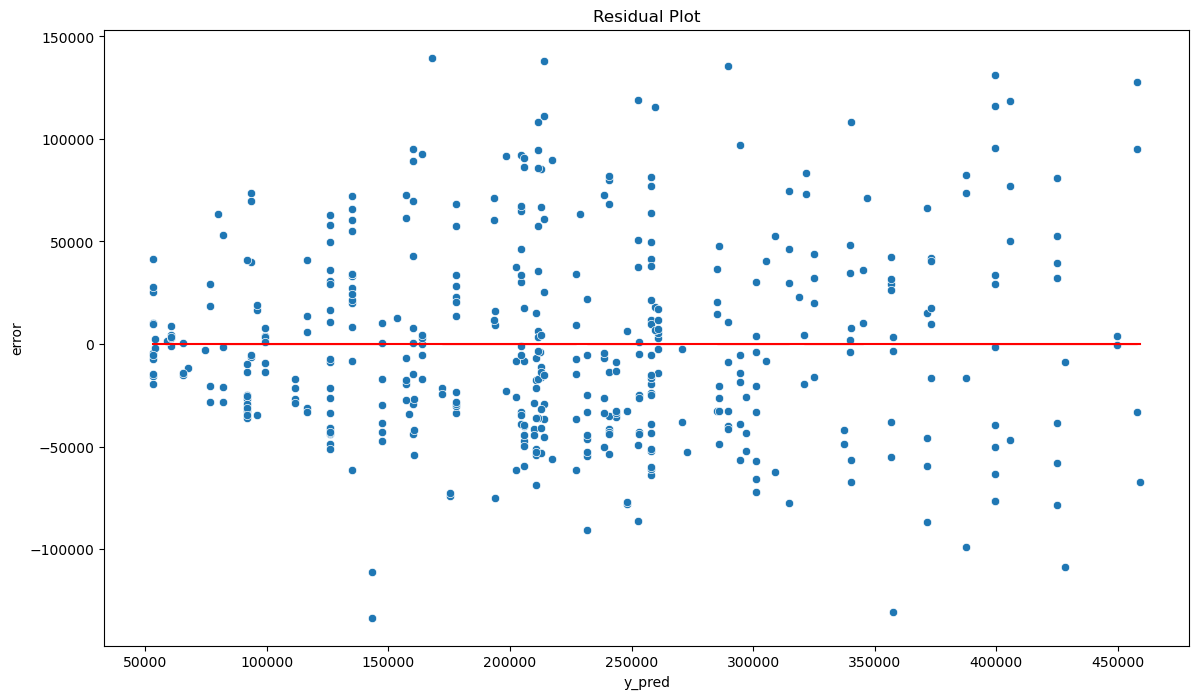

In [1056]:
df_error = pd.DataFrame({
    'y_pred':y_pred,
    'error': (y_test - test_predictions)
})

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_error, x="y_pred", y="error")
sns.lineplot(data=df_error, x="y_pred", y=0, color="r")
plt.title("Residual Plot")
plt.show()

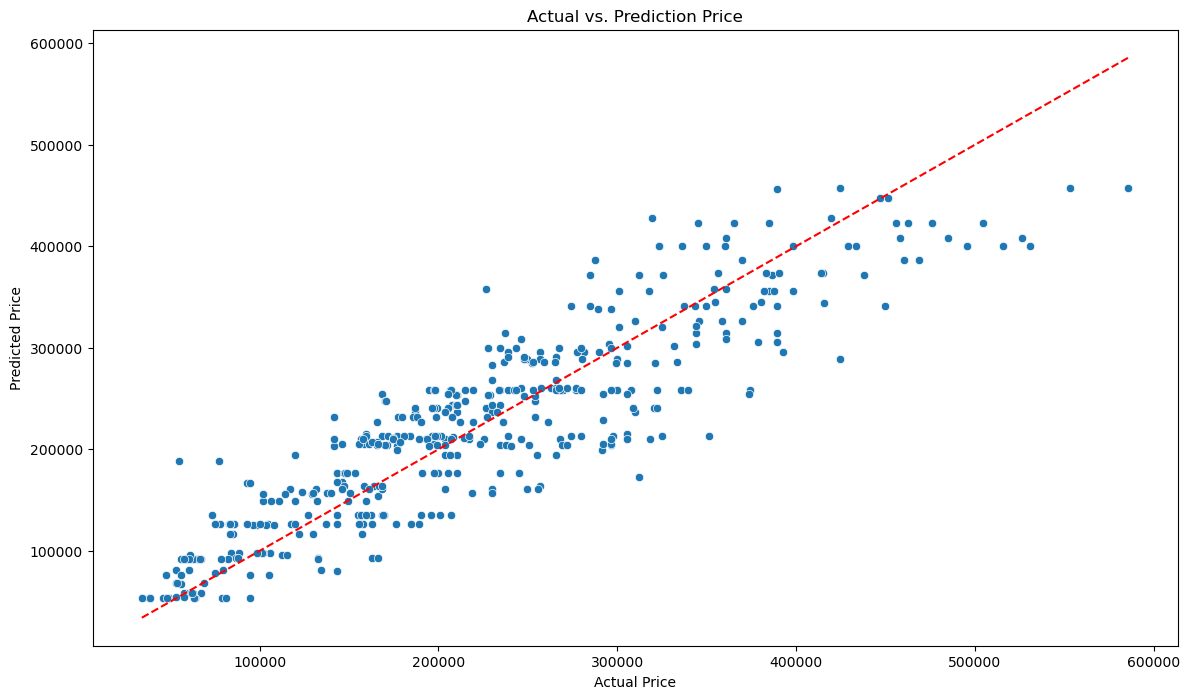

In [1057]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

# Create scatter plot
sns.scatterplot(x=y_test, y=test_predictions)

# Plot the line of perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Set title and labels
plt.title('Actual vs. Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

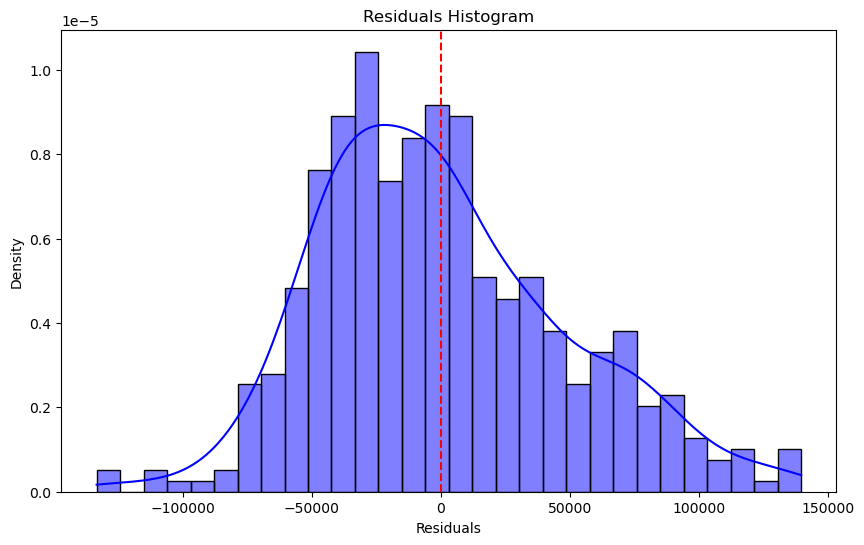

In [1058]:
y_residual = y_test - test_predictions

plt.figure(figsize=(10, 6))
sns.histplot(y_residual, kde=True, bins=30, color='blue', stat="density") 
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.axvline(0, color="red", linestyle="--")
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 5

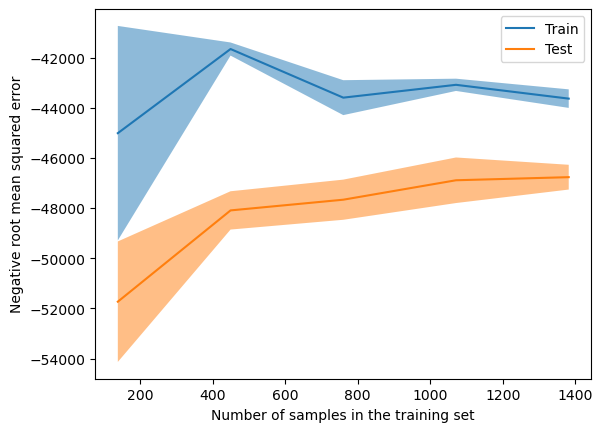

In [912]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(base_tune_rf, X_train, y_train, scoring='neg_root_mean_squared_error')

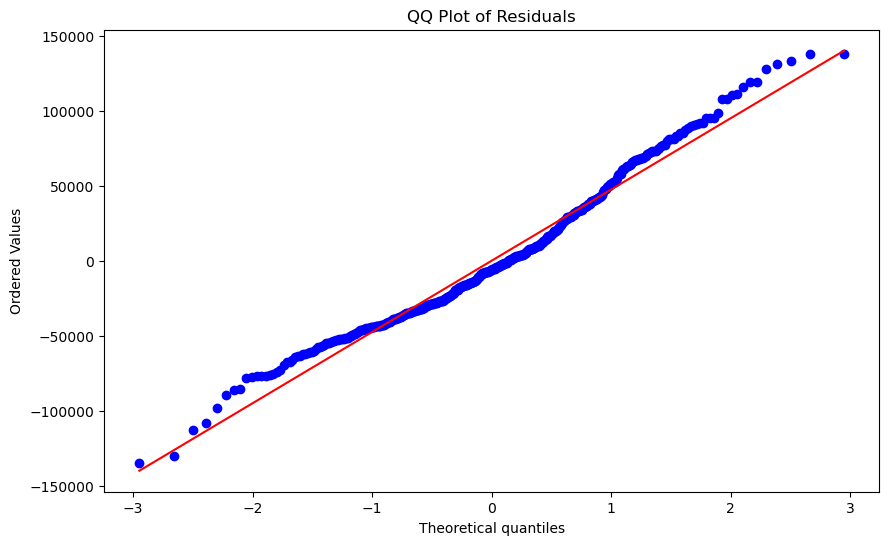

In [985]:
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(y_residual, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

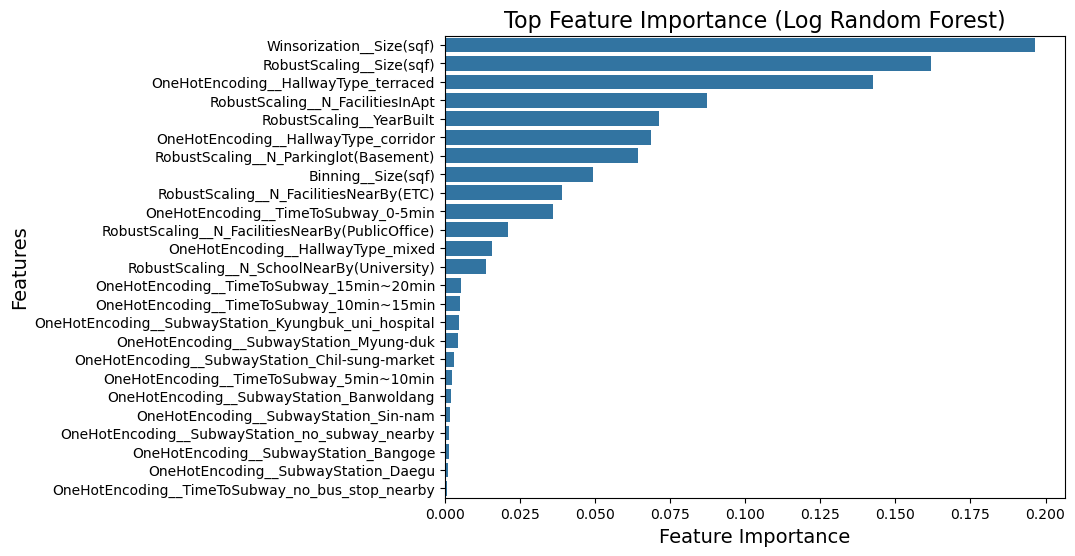

In [986]:
best_pipeline = base_tune_rf.best_estimator_
rf_model = best_pipeline.named_steps['modeling']

# Jika model menggunakan TransformedTargetRegressor, ambil model internalnya
if hasattr(rf_model, 'regressor_'):
    rf_model = rf_model.regressor_

# Ambil feature importances
feature_importances = rf_model.feature_importances_

# Ambil nama fitur dari transformer
feature_names = bin_transformer.get_feature_names_out()

transformed_features_cleaned = [
    feature.replace("OneHotEncoding__", "").replace("Winsorization__", "") 
    for feature in feature_names
]

# Buat DataFrame untuk visualisasi
feature_imp = pd.DataFrame({
    "Features": feature_names,
    "Value": feature_importances
}).sort_values("Value", ascending=False)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_imp, x="Value", y="Features")
plt.title("Top Feature Importance (Log Random Forest)", fontsize=16)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

In [987]:
import shap
shap.initjs()

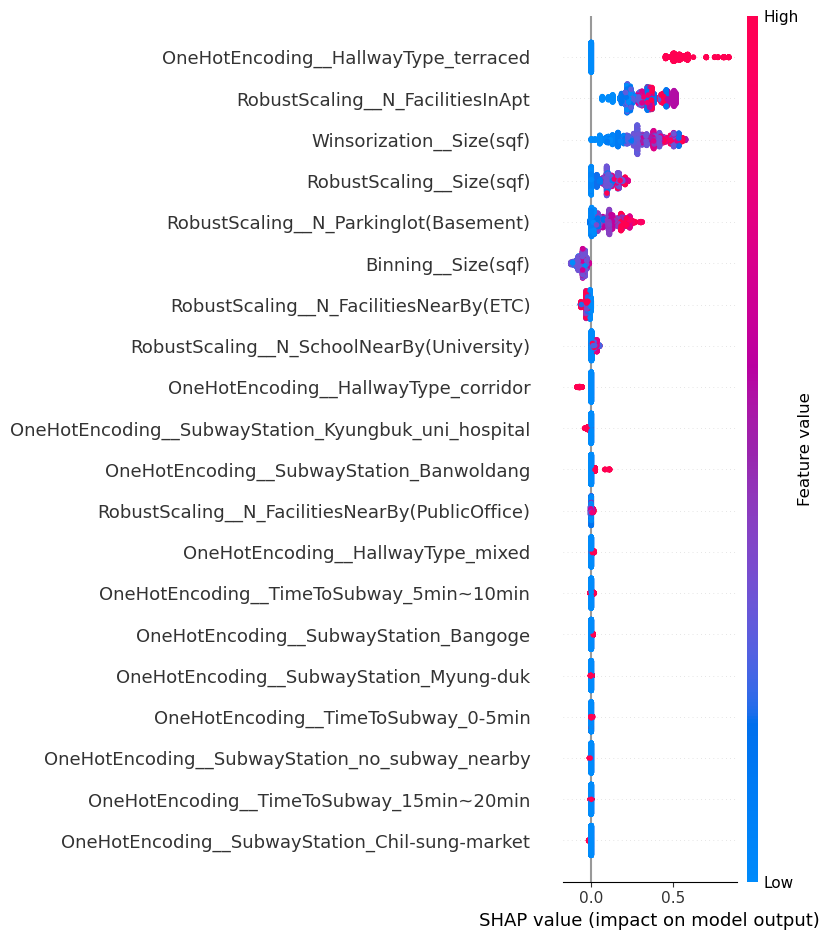

In [988]:
model = base_pipe_rf.named_steps['modeling'].regressor_
preprocessor = base_pipe_rf.named_steps['FeatureEngineering']

X_train_pre = preprocessor.transform(X_train)
X_train_pre_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())

X_test_pre = preprocessor.transform(X_test)
X_test_pre_df = pd.DataFrame(X_test_pre, columns=preprocessor.get_feature_names_out())
explainer = shap.TreeExplainer(model=model,
                                data=X_train_pre_df,
                                feature_names=preprocessor.get_feature_names_out())
shap_values = explainer.shap_values(X_train_pre)
shap.summary_plot(shap_values, X_train_pre, feature_names=preprocessor.get_feature_names_out())

**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

**7.6 Model Calibration (Classification Only)**

**7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

## **Section 8. Model Deployment**

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


**9.2 What are the limitations of the model ?**

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)